In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv("../dataset_mood_smartphone_clean.csv")

In [5]:
df.head()

,id,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood,target
0,AS14.01,9559.682,28042.367,5653.099,3062.187,333.305,28.098,343.697,6396.461,458.411,...,928.988,0.000,8.0,55840.403998,5.0,0.087991,-0.291667,0.952381,7.680000,8.000000
1,AS14.02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,106.887,0.000,...,0.000,0.000,39.0,13.080000,6.0,0.081835,-0.666667,-0.166667,5.666667,9.000000
2,AS14.03,1598.930,4145.468,12209.611,56.467,0.000,14.902,1055.128,0.000,252.664,...,46.399,0.000,23.0,22151.371000,2.0,0.105415,-0.947368,1.052632,7.500000,7.666667
3,AS14.05,4203.526,20346.719,1018.870,0.000,0.000,0.000,816.424,2523.125,0.000,...,87.530,0.000,3.0,29245.021996,12.0,0.044154,-0.130435,1.000000,6.913043,6.333333
4,AS14.06,2021.525,14004.311,4517.613,0.000,0.000,419.788,866.989,9215.704,125.455,...,0.000,8.026,3.0,28065.064999,3.0,0.140943,-0.687500,0.400000,6.937500,7.000000


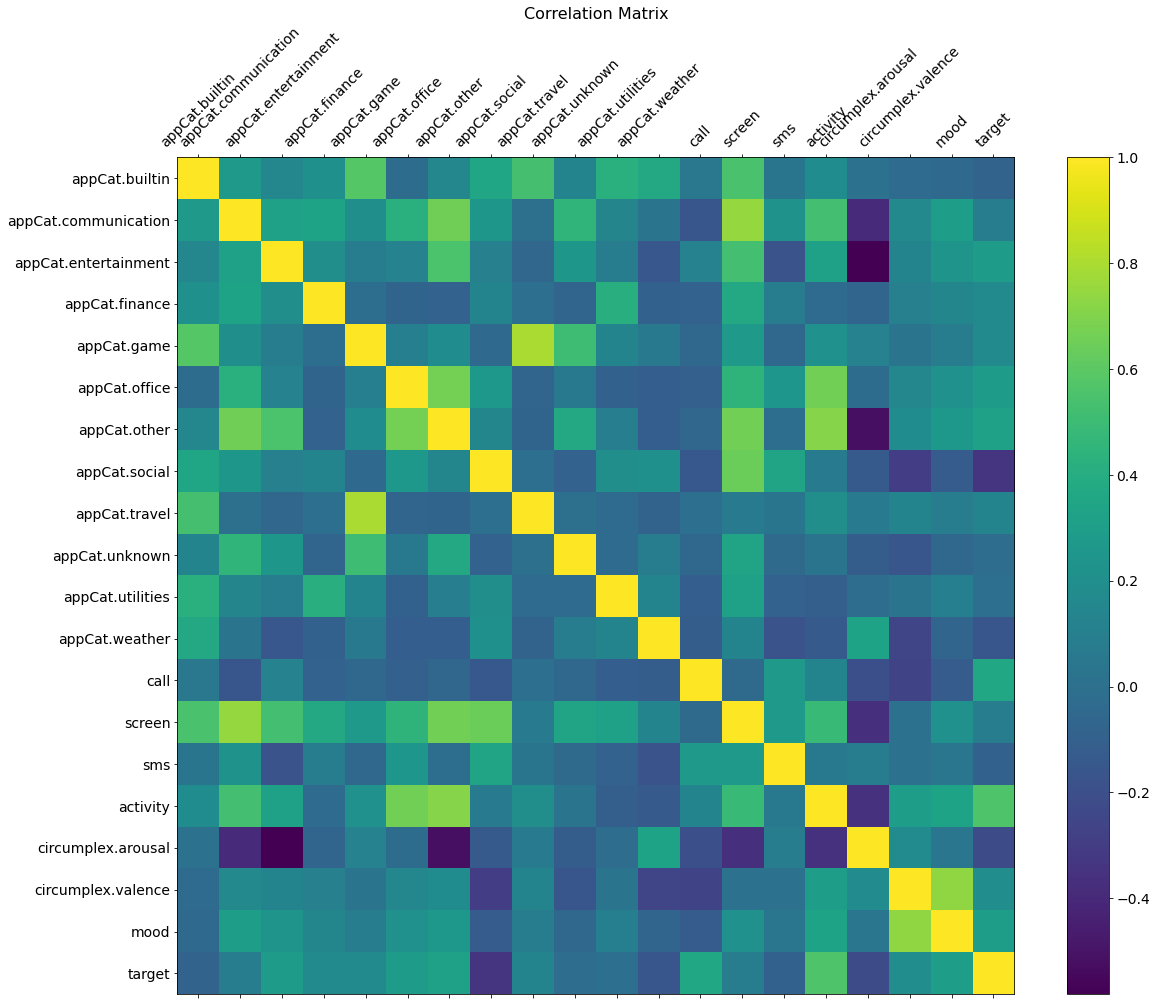

In [9]:
corr_df = df
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(corr_df.select_dtypes(['number']).shape[1]), corr_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# SVM
# Decision trees

In [20]:
target = df['target']

In [16]:
features= df.drop(['target','id'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [24]:
# Split the data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.25, random_state = 42)

In [25]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_target.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', train_target.shape)


Training Features Shape: (20, 19)
Training Labels Shape: (20,)
Testing Features Shape: (7, 19)
Testing Labels Shape: (20,)


In [34]:
# The baseline predictions are the historical averages
baseline_preds = np.array(df['mood'])
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - target)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.5


In [32]:
test_target

8     8.000000
13    7.000000
9     7.000000
21    8.000000
0     8.000000
11    7.333333
16    7.000000
Name: target, dtype: float64

In [30]:
baseline_preds

array([7.68      , 5.66666667, 7.5       , 6.91304348, 6.9375    ,
       5.78571429, 7.        , 5.66666667, 7.95454545, 6.70588235,
       6.94736842, 7.07692308, 7.22222222, 7.12      , 7.45454545,
       7.36842105, 6.77777778, 6.70833333, 7.125     , 6.85      ,
       7.48      , 7.92      , 6.85714286, 6.69565217, 7.27272727,
       7.04545455, 7.07692308])